In [5]:
import numpy as np
import os
from PIL import Image

from scipy.ndimage import shift
from skimage import io

import matplotlib.pyplot as plt
%matplotlib inline

import ipywidgets as widgets
from ipywidgets import interactive


In [6]:
image1 = os.path.join("data",  "siemens_star.tif")
assert os.path.exists(image1), f"File does not exist: {image1}"


In [7]:
config = {'chip1': {'xoffset': 1,
                    'yoffset': 1,
                    'description': 'top right chip'},
            'chip2': {'xoffset': 0,
                    'yoffset': 0,
                    'description': 'top left and reference chip'},
            'chip3': {'xoffset': 0,
                        'yoffset': 1,
                        'description': 'bottom left chip'},
            'chip4': {'xoffset': 1,
                    'yoffset': 2,
                    'description': 'bottom right chip'}
}

shift_config = {'chip1': {'xoffset': 2.4,
                    'yoffset': 1,
                    'description': 'top right chip'},
            'chip2': {'xoffset': 0,
                    'yoffset': 0,
                    'description': 'top left and reference chip'},
            'chip3': {'xoffset': 0,
                        'yoffset': 1,
                        'description': 'bottom left chip'},
            'chip4': {'xoffset': 2.3,
                    'yoffset': 2.3,
                    'description': 'bottom right chip'}
}



In [8]:
# Load images
data_images1 = np.array(Image.open(image1))

In [9]:
# # preview
# fig, ax = plt.subplots(figsize=(10, 10))
# ax.imshow(data_images1)
# ax.set_title("Image 1: normalized_sample_8997_obs_8999")
# # ax.axis('off')
# plt.show()

# Applying shift correction based on the configuration

In [13]:
def apply_shift_correction(image, shift_config):

    image[np.isnan(image)] = 0
    image[np.isinf(image)] = 0

    # create an empty array for new image
    new_image = np.zeros_like(image)

    # chip 2 (fixed one)
    new_image[0:256, 0:256] = image[0:256, 0:256]

    # chip 1
    region = image[0:256, 256:]
    chips1_shift = (shift_config['chip1']['yoffset'], shift_config['chip1']['xoffset'])
    shifted_data = shift(region, shift=chips1_shift, order=3)
    new_image[0:256, 256:] = shifted_data

    # chip 3
    region = image[256:, 0:256]
    chips3_shift = (shift_config['chip3']['yoffset'], shift_config['chip3']['xoffset'])
    shifted_data = shift(region, shift=chips3_shift, order=3)
    new_image[256:, 0:256] = shifted_data

    # chip 4
    region = image[256:, 256:]
    chips4_shift = (shift_config['chip4']['yoffset'], shift_config['chip4']['xoffset'])
    shifted_data = shift(region, shift=chips4_shift, order=3)
    new_image[256:, 256:] = shifted_data

    return new_image

In [14]:
new_image = apply_shift_correction(data_images1, shift_config)

Text(0.5, 1.0, 'Corrected Image')

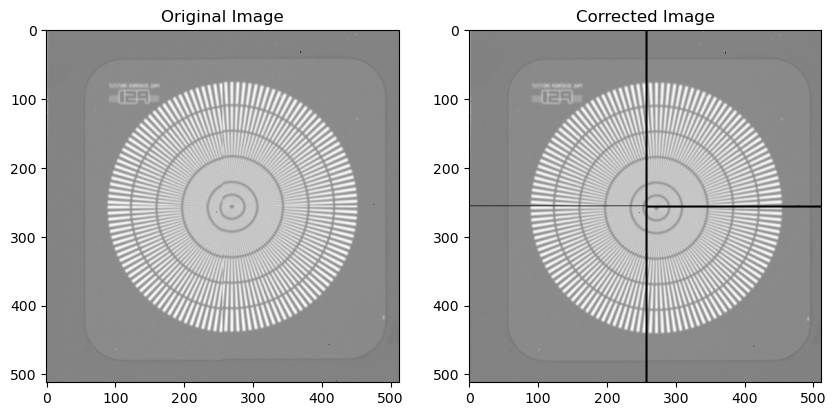

In [15]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 10))
axs[0].imshow(data_images1, cmap='gray')
axs[0].set_title("Original Image")
axs[1].imshow(new_image, cmap='gray')
axs[1].set_title("Corrected Image")